Даны результаты работы двух машинных переводчиков на небольших выборках переводов для разных языковых пар.

Стандартная оценка качества перевода производится с использованием специальной метрики `BLEU`. (Реализовано здесь).

Требуется опеделить:

- превосходит ли один переводчик в среднем по парам второй переводчик по переводу
- связано ли качество перевода для разных языковых пар для двх переводчиков?

При подсчете `BLEU` учитывать только слова, регистр не учитывать.

_Формат данных_

Названиие файлов имеет формат `lang1_lang2_<translator_id>.txt`:

`lang_1`, `lang_2` --- языки (перевод с `lang_1` на `lang_2`).

`gold` - эталонный вариант, с которым сравнивается перевод от систем машинного перевода.

In [9]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu
from scipy.stats import shapiro, wilcoxon
from razdel import tokenize
import matplotlib.pyplot as plt
import re

In [10]:
lang_list = ['de_en', 'en_kk', 'en_ru', 'ru_de', 'ru_kk']
bleu1 = []
bleu2 = []
land_to_bleu1 = {}
land_to_bleu2 = {}

for lang in lang_list: 
    with open(f"data/mt/{lang}_1.txt", 'rb') as f1:
        word_list_1 = [re.findall(r'\w+', str(string).lower())[1:-2] for string in f1.readlines()]

    with open(f"data/mt/{lang}_2.txt", 'rb') as f2:
        word_list_2 = [re.findall(r'\w+', str(string).lower())[1:-2] for string in f2.readlines()]

    with open(f"data/mt/{lang}_gold.txt", 'rb') as f3:
        word_list_gold = [re.findall(r'\w+', str(string).lower())[1:-2] for string in f3.readlines()]
    
    tmp_bleu1 = []
    tmp_bleu2 = []

    for g, w1, w2 in zip(word_list_gold, word_list_1, word_list_2):
        tmp_bleu1.append(sentence_bleu([g], w1))
        tmp_bleu2.append(sentence_bleu([g], w2))
    
    bleu1 += tmp_bleu1
    bleu2 += tmp_bleu2
    land_to_bleu1[lang] = sum(tmp_bleu1) / len(word_list_gold)
    land_to_bleu2[lang] = sum(tmp_bleu2) / len(word_list_gold)
    
print(f"BLEU for 1 model: {land_to_bleu1}")
print(f"BLEU for 2 model: {land_to_bleu2}")

c:\Users\yarem\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\yarem\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\yarem\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

BLEU for 1 model: {'de_en': 0.24675644793884055, 'en_kk': 0.42344740092095706, 'en_ru': 0.41843422642843137, 'ru_de': 0.5973414872783456, 'ru_kk': 0.11493489546276679}
BLEU for 2 model: {'de_en': 0.2766887368120388, 'en_kk': 0.42490942803065535, 'en_ru': 0.42045401272506894, 'ru_de': 0.5904605806675705, 'ru_kk': 0.22914617817542118}


На первый взгляд, второй переводчик лучше

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


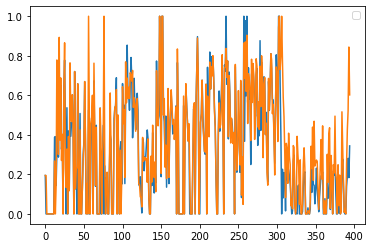

In [11]:
plt.plot(bleu1, )
plt.plot(bleu2)
plt.legend()

Используем Шапиро-Уилка для проверки нормальности выборок:

In [12]:
print(f'shapiro BLEU-1: {shapiro(bleu1)}')
print(f'shapiro BLEU-2: {shapiro(bleu2)}')

shapiro BLEU-1: ShapiroResult(statistic=0.9263837337493896, pvalue=5.064459051781767e-13)
shapiro BLEU-2: ShapiroResult(statistic=0.9442670345306396, pvalue=5.000416400391394e-11)


p-value маленький => отвергаем гипотезу о нормальности

In [14]:
print(wilcoxon(bleu2, bleu1, alternative='greater'))

WilcoxonResult(statistic=35081.0, pvalue=1.0577297694726641e-07)


Отсюда получаем, что второй переводчик действительно лучше с точки зрения метрики BLUE